# Taller 3 Visualización

### GLobal Smartphone shipments

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset simulado
data = r"global_smartphone_shipments.csv"

df = pd.read_csv(data)
df.head()

,Company,Region,Shipments_Millions
0,Samsung,North America,45
1,Samsung,Europe,65
2,Samsung,Asia,180
3,Apple,North America,70
4,Apple,Europe,60


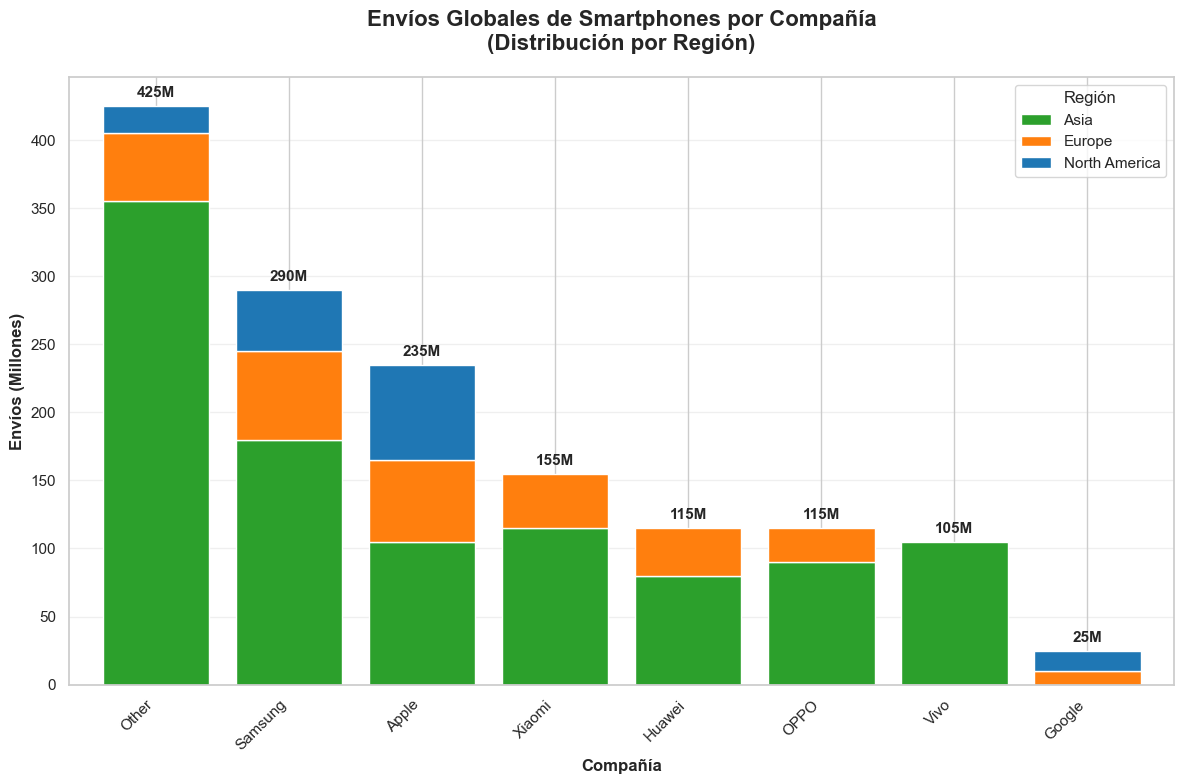

In [14]:
#Punto 1:Comparar ventas totales y proporciones entre marcas o regiones. Diagramna de barras agrupadas

import matplotlib.pyplot as plt

# Crear tabla pivote para organizar datos
pivot_company = df.pivot_table(
    index='Company', 
    columns='Region', 
    values='Shipments_Millions', 
    fill_value=0
)

# Calcular totales para ordenar por volumen
pivot_company['Total'] = pivot_company.sum(axis=1)
pivot_company_sorted = pivot_company.sort_values('Total', ascending=False)

# Eliminar columna Total para el gráfico
plot_data_company = pivot_company_sorted.drop('Total', axis=1)

# Colores para las regiones
region_colors = {'North America': '#1f77b4', 'Europe': '#ff7f0e', 'Asia': '#2ca02c'}

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 8))

# Gráfica apilada por compañía
plot_data_company.plot(
    kind='bar', 
    stacked=True, 
    ax=ax,
    color=[region_colors.get(col, '#gray') for col in plot_data_company.columns],
    width=0.8
)

# Configurar el gráfico
ax.set_title('Envíos Globales de Smartphones por Compañía\n(Distribución por Región)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Compañía', fontsize=12, fontweight='bold')
ax.set_ylabel('Envíos (Millones)', fontsize=12, fontweight='bold')
ax.legend(title='Región', title_fontsize=12, fontsize=11)
ax.set_xticklabels(plot_data_company.index, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Agregar valores totales encima de cada barra
for i, company in enumerate(plot_data_company.index):
    total = pivot_company_sorted.loc[company, 'Total']
    ax.text(i, total + max(pivot_company_sorted['Total']) * 0.01, f'{int(total)}M', 
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Análisis del Gráfico


### Volumen Total
- Samsung domina con 290M de envíos, seguido de Apple con 235M
- Existe una clara brecha entre los líderes y el resto del mercado
- Other representa 425M, indicando un mercado muy fragmentado

### Distribución Regional
- Asia es dominante en casi todas las compañías (segmentos verdes más grandes)
- Samsung tiene la distribución más equilibrada entre las tres regiones
- Apple tiene mayor presencia relativa en North America comparado con otros



### Insights Clave:

### Liderazgo de Mercado
1. Samsung lidera con estrategia global balanceada
2. Apple es segundo, con fortaleza en mercados premium (NA/Europa)
3. Las marcas chinas (Xiaomi, OPPO, Vivo, Huawei) se concentran fuertemente en Asia

### Patrones Regionales
- Asia representa ~65% del mercado global - es el battleground principal
- North America muestra menor competencia (principalmente Apple, Samsung, Other)
- Europa tiene competencia más diversificada

### Estrategias Empresariales
- Samsung: Estrategia verdaderamente global (presente fuerte en las 3 regiones)
- Apple: Focus en mercados de alto valor (NA 30%, Europa 26% de su mix)
- Marcas chinas: Dominio regional en Asia con poca penetración occidental

---

### Decisiones de Negocio que Facilita
- ¿Dónde competir? Asia es crítico para cualquier estrategia global
- ¿Cómo competir? Samsung muestra que la diversificación regional funciona
- ¿Contra quién? Identifica competidores directos por región
- ¿Qué oportunidades? North America y Europa menos saturados para marcas emergentes



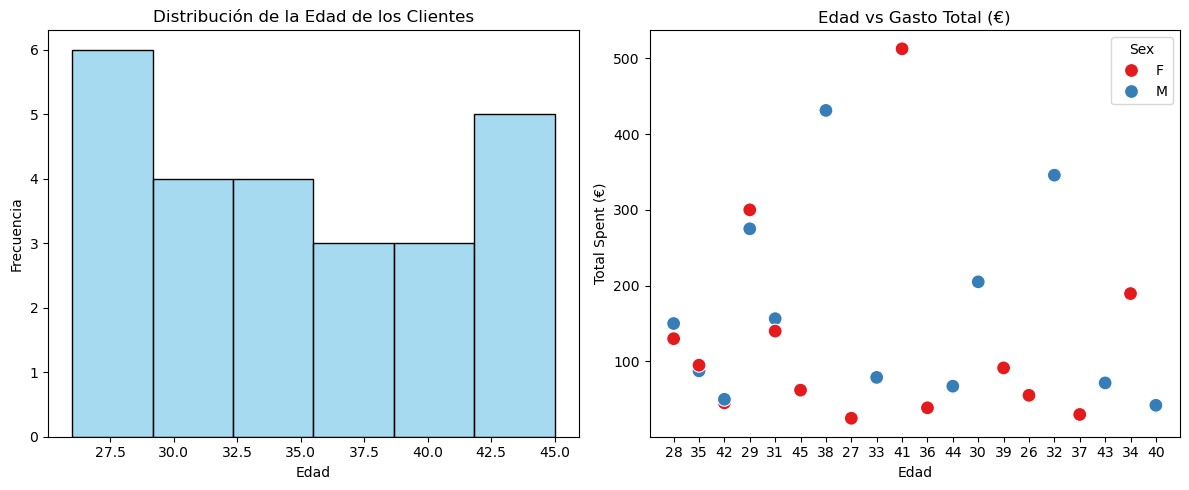

C:\Users\jespi\AppData\Local\Temp\ipykernel_6116\2865420682.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


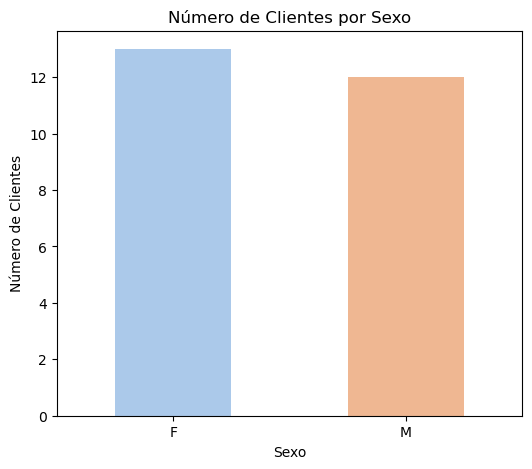

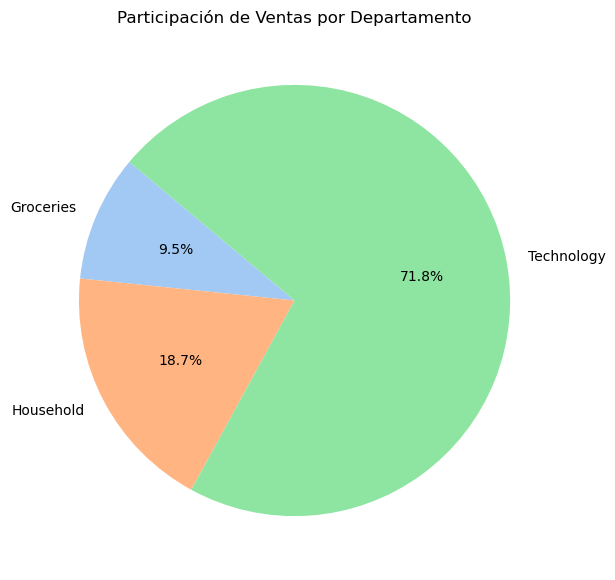

In [11]:
#Punto 2 Customer spending data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset

df = pd.read_csv(r"customer_spending_data.csv")

# 1. Caracterización por edad y gasto

plt.figure(figsize=(12,5))

# Histograma de edades
plt.subplot(1,2,1)
sns.histplot(df["Age"], bins=6, color="skyblue")
plt.title("Distribución de la Edad de los Clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Dispersión Edad vs Gasto
plt.subplot(1,2,2)
sns.scatterplot(data=df,  x=df["Age"].astype(str), y="Total_Spent_EUR", hue="Sex", palette="Set1", s=100)
plt.title("Edad vs Gasto Total (€)")
plt.xlabel("Edad")
plt.ylabel("Total Spent (€)")

plt.tight_layout()
plt.show()


# 2. Número de clientes por sexo

plt.figure(figsize=(6,5))
ax = sns.countplot(
    data=df, 
    x="Sex", 
    palette="pastel", 
    width=0.5 
)

plt.title("Número de Clientes por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de Clientes")
plt.show()



# 3. Total de ventas por departamento

dept_sales = df.groupby("Department")["Total_Spent_EUR"].sum()

plt.figure(figsize=(7,7))
plt.pie(dept_sales, labels=dept_sales.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Participación de Ventas por Departamento")
plt.show()


### Monthly website metrics

In [7]:
# Dataset simulado
data = r"monthly_website_metrics.csv"

df = pd.read_csv(data)
df.head()

,Month,Visitors,New_Visitors,Bounce_Rate_Pct,Avg_Session_Duration_Min
0,Jan,12500,8500,62.1,2.1
1,Feb,13800,9200,59.8,2.3
2,Mar,15600,10100,58.3,2.4
3,Apr,14200,8700,61.5,2.2
4,May,16300,10200,57.2,2.6


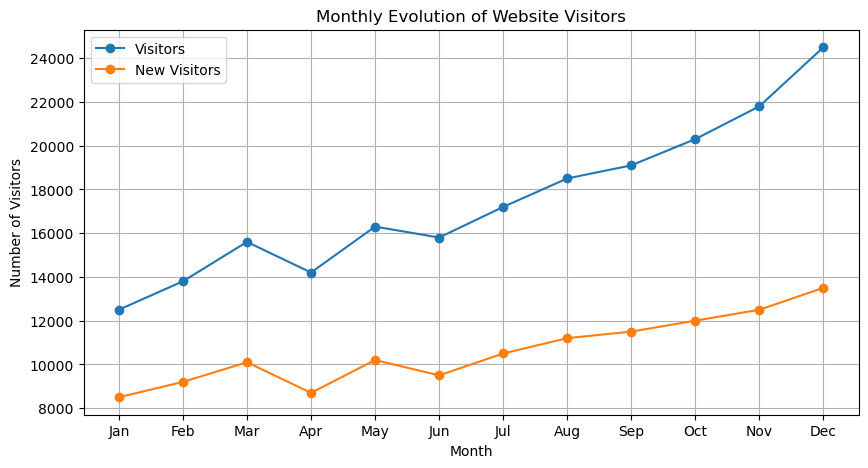

In [8]:
# Graficar usando las columnas que ya existen
plt.figure(figsize=(10,5))
plt.plot(df["Month"], df["Visitors"], marker="o", label="Visitors")
plt.plot(df["Month"], df["New_Visitors"], marker="o", label="New Visitors")
plt.title("Monthly Evolution of Website Visitors")
plt.xlabel("Month")
plt.ylabel("Number of Visitors")
plt.legend()
plt.grid(True)
plt.show()

El gráfico muestra una tendencia de crecimiento sostenido tanto en visitantes como en nuevos visitantes a lo largo del año, alcanzando en diciembre el nivel más alto de tráfico. Se observa que cuando los nuevos visitantes disminuyen (como en abril o agosto), mientras que en los meses de mayor afluencia (marzo, mayo y el último trimestre) los usuarios interactúan más con el sitio.